# Comparing Regression Algorithms - Part 1, Introduction

### Introduction

Do you remember Linear Equations from Algebra? For most people, `y = mx + b` is pretty much the only thing they remember from Algebra. It turns out that this simple relationship is becoming really important these days for Machine Learning - that new-fangled technology that allows Siri to recognize what you're saying and for these Raspberry Pis to recognize the Caltrain passing by [some bored data scientists's window](http://svds.com/tensorflow-image-recognition-raspberry-pi/).

[![IMAGE ALT TEXT](http://img.youtube.com/vi/n0lCPXzaxTg/0.jpg)](http://www.youtube.com/watch?v=n0lCPXzaxTg "Video Title")

###  `y = mx + b`

When I took Algebra I in the 8th grade ([in the 90s...](https://youtu.be/5EdmHSTwmWY)), we were asked to take a set of (x, y) coordinate pairs and find the equation that fit those coordinate pairs. Graphing calculators were just beginning to come onto the scene in high schools, and middle school students were only expected to find an equation for data points that fit perfectly inside the equation...

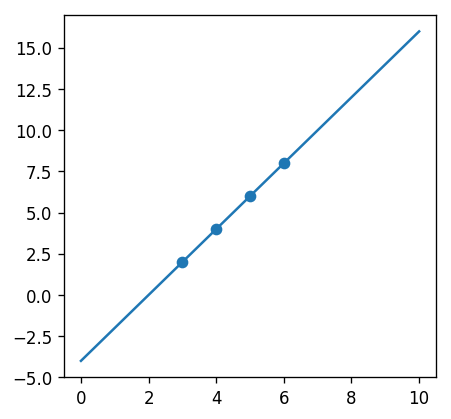

In [18]:
# Let's make a graph!

%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(num=None, figsize=(4, 4), dpi=120)

# numpy is great at working with lists of numbers
import numpy as np


# Some (x, y) point to scatter plot
x_vals = [ 3, 4, 5, 6 ]
y_vals = [ 2, 4, 6, 8 ]
plt.scatter(x_vals, y_vals)


# Now let's plot an equation
# Let's plot the equation with x values 0 and 10
x =  np.linspace(0, 10, 2)
# This equation creates our corresponding y values
y = 2 * x - 4
# Now plot them as a straight line
plt.plot(x, y)

### Regression

This is all well and good, but in science we often don't have clean sets of data points...

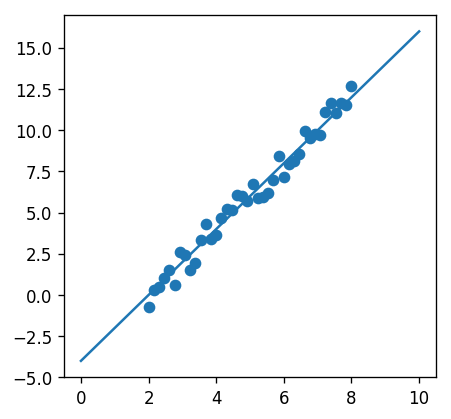

In [26]:
# Let's make a graph!

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(num=None, figsize=(4, 4), dpi=120)

# Let's make a bunch of x values
x_vals = np.linspace(2, 8, 40)
# Let's make a bunch of y values close to our equation, but randomly off by a small amount
y_vals = 2 * x_vals - 4 + np.random.uniform(-1, 1, 40)
# Now plot them
plt.scatter(x_vals, y_vals)

# Let's plot our original line
x =  np.linspace(0, 10, 2)
# This equation creates our corresponding y values
y = 2 * x - 4
# Now plot them as a straight line
plt.plot(x, y)

...to get an equation that fits our data, we perform an operation called *regression*, which allows us to find a close line. Before we tackle regression, let's change the variables in our equation from:

`y = m * x + b`

to

`y = W * x + b`

(I promise there's a reason for this.) The goal of regression is that for a set of (x, y) points, we want to find the best values of `W` and `b` that make a line with the closest fit for those points.

### How good is our regression?

If we were using a graphing calculator or some type of regression feature in statistics software, one of the outputs will be the _*coefficient of correlation*_. It's a number, typically represented by `r` that shows not only the type of correlation (negative, positive or no correlation) but how correlated the data is. This is good for evaluating the _*result*_ of our regression, but is more of an evaluation of the end product than something that helps us find the actually regression values.

A common regression _*technique*_ is to use the [Least Squares](https://en.wikipedia.org/wiki/Least_squares) method. (If you don't understand the calculus in that Wikipedia article, that's fine.) Within the technique, we evaluate "how close" we are by computing a value called `loss`. We get loss by finding how close an individual point is in the equation we _*think*_ might be a good fit to the point that it's supposed to be, taking the difference, squaring it, and then adding it to all of the other squares of differences. For example, let's take the following (x, y) coordinates as the values we are trying to fit:

`(0, 2), (1, 4), (2, 6) ,(3, 8)`

Let's pretend that we are trying to compute the loss for a `W` value of `3` and a `b` value of `1`. In other words, we are guessing that the equation might be:

`y = 3 * x + 1`

(It's not. It's waaaaaay off.)

With a little Python:

In [7]:
import numpy as np

# Make x values 
x = np.linspace(0, 3, 4)
print "x values: ", x

# Make actual y values
y = np.linspace(2, 8, 4)
print "y values: ", y

# Make really bad guesses
bad_y = 3 * x + 1

print "bad_y values: ", bad_y

x values:  [ 0.  1.  2.  3.]
y values:  [ 2.  4.  6.  8.]
bad_y values:  [  1.   4.   7.  10.]


Let's see what the loss is. We find the difference of each corresponding y values, square them, and then add up the squares. For these operations, I'll use `numpy`, which is a Python package that (among other things) works with lists of numbers.

In [15]:
differences = bad_y - y
print "Differences: ", differences

print "Squares of differences: ", np.square(differences)

print "loss - Sum of squares of differences: ", np.sum(np.square(differences))

Differences:  [-1.  0.  1.  2.]
Squares of differences:  [ 1.  0.  1.  4.]
loss - Sum of squares of differences:  6.0


This number isn't great. We want the loss to be small. But that's okay. It's an intermediate number that lets our regression technique adjust for better values of `W` and `b`.

### Comparing regression algorithms

So, why is the technique important? Computers are very fast. However, even [Stampede at the Texas Adavanced Computing Center](https://www.tacc.utexas.edu/stampede/) we care about how fast our programs run. We even care about how much energy they use! Supercomputers are great at performing large quantities of mathematical operations (Stampede can do about 9 quadrillion decimal operations per second) but the time it takes to do these operations and the amount of electricity it costs add up very quickly. Therefore, we have several ways of measuring performance that we will look at it in this series:

- Execution time (what really matters is how much time it takes)
- Best case scenario (when we are [optimistic](https://pbs.twimg.com/profile_images/716986458406424576/8AOacOOQ.jpg))
- Worst case scenario (when we are the [opposite of optimistic](https://s-media-cache-ak0.pinimg.com/736x/c2/2d/d4/c22dd4376c7b9668be105867a86900ef.jpg))
- Order of complexity (when we assign a descriptive expression that are powers or logarithms based on `n` values we have to operate on.)
- Scalability (if we have more coordinates to regress, how much slower does our algorithm get?)

### Next section - [Comparing Regression Algorithms - Part 2, Brute Force](Comparing Regression Algorithms - Part 2, Brute Force.ipynb)